In [ ]:
import torch
import numpy as np
import timeit
import matplotlib.pyplot as plt
import matplotlib

Solve an ODE of the form $\dot y = f(t,y)$

Forward Euler method: $y_{j+1} = y_j + hf(t_j,y_j)$


In [ ]:
def forwardEuler(func,y0,h,n):
  Y = torch.zeros(n+1)
  Y[0] = y0
  t    = torch.zeros(n+1)
  for k in range(n):
    Y[k+1] = Y[k] + h*func(t,Y[k])
    t[k+1] = t[k] + h

  return t, Y


Total Integration Time  10.0 sec
2.0 59049.0
1.0 1048576.0
0.5 3325.25634765625
0.25 0.5365048050880432
0.125 0.16026145219802856
0.0625 0.06665444374084473
0.03125 0.030792176723480225
0.015625 0.014850646257400513
0.0078125 0.007304072380065918
0.00390625 0.003622114658355713


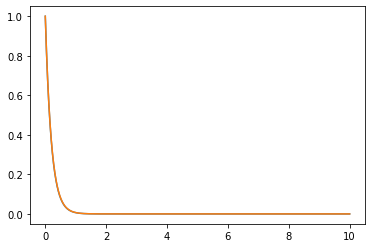

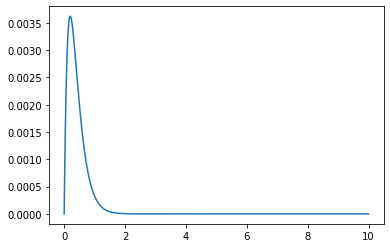

In [ ]:
# check its running
# dy/dt = -a*y ->  y = y_0 * exp(-a*y)
def fun(t,y):
  a  = -5.0
  yp = a*y 
  return yp

y0 = 1.0
h  = 2.0
n  = 5

print('Total Integration Time ', n*h, 'sec')

for i in range(10):
  t, Ycomp = forwardEuler(fun,y0,h,n)
  Ytrue = torch.exp(-5*t)
  err = torch.max(torch.abs(Ycomp-Ytrue)).item()
  print(h, err)
  h = h/2
  n = 2*n


plt.figure(1)
plt.plot(t,Ycomp)
plt.plot(t,Ytrue)
plt.figure(2)
plt.plot(t,torch.abs(Ycomp-Ytrue))



$$ f(y) = {\rm det}\begin{pmatrix} y^2+1 &  y \\ -y & y^3  + 1\end{pmatrix} $$

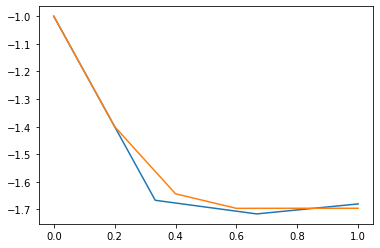

In [ ]:
def myDetFun(t,y):
  A = torch.tensor([[y**2+1, y],[-y, y**3+1]])
  f = -torch.trace(A)

  return f

y0 = -1.0
h  = 1/3
n  = 3
t1, Ycomp1 = forwardEuler(myDetFun,y0,h,n)

plt.plot(t1,Ycomp1)

h  = 0.2
n  = 5
t2, Ycomp2 = forwardEuler(myDetFun,y0,h,n)
plt.plot(t2,Ycomp2)


Solve a 2x2 system of the form
\begin{eqnarray}
&& \dot y_1 = y_2 \\
&& \dot y_2 = -y_1 
\end{eqnarray}


Same as
$$ \ddot y = - y $$



In [ ]:
def goat(t,y):
  A = torch.tensor([[0, 1],[-1, 0.0]])
  f = A@y.t()

  return f

def forwardEulerVec(func,y0,h,n):
  k = y0.shape[0]
  Y = torch.zeros(n+1,k)
  Y[0,:] = y0
  t    = torch.zeros(n+1)
  for k in range(n):
    Y[k+1,:] = Y[k,:] + h*func(t,Y[k,:])
    t[k+1] = t[k] + h

  return t, Y


In [ ]:
y0 = torch.tensor([1.0,0])

t, Ycomp = forwardEulerVec(goat,y0,0.01,10000)

In [ ]:
Ycomp.shape

torch.Size([10001, 2])

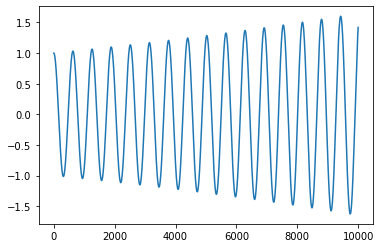

In [ ]:
plt.plot(Ycomp[:,0])

In [ ]:
def leapFrog(func,y0,h,n):
  k = y0.shape[0]
  Y = torch.zeros(n+1,k)
  Y[0,:] = y0 
  # note Y[1,:] initialized using forward Euler
  Y[1,:] = Y[0,:] + h*func(0,Y[0,:]) 
  t    = torch.zeros(n+1)
  t[1] = h
  for k in range(1,n):
    Y[k+1,:] = Y[k-1,:] + 2*h*func(t[k],Y[k,:])
    t[k+1] = t[k] + h

  return t, Y

In [ ]:
y0 = torch.tensor([1.0,0])

t, Ycomp = leapFrog(goat,y0,0.01,10000)

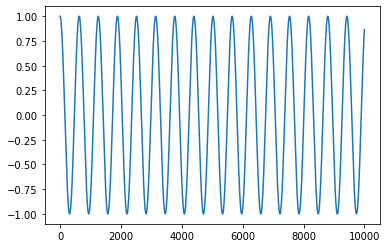

In [ ]:
plt.plot(Ycomp[:,0])

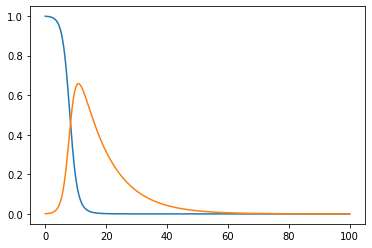

In [ ]:
def SIRmodel(t,y,beta=0.95, gamma=0.1):
  # y[0] = S    y[1] = I
  f = torch.zeros(2)
  f[0] = -beta*y[0]*y[1]
  f[1] = beta*y[0]*y[1] - gamma*y[1]

  return f

y0 = torch.tensor([0.999,0.001])

f = SIRmodel(0.5,y0)

t, Y = forwardEulerVec(SIRmodel,y0,0.01,10000)  

plt.plot(t,Y[:,0])
plt.plot(t,Y[:,1])





In [ ]:
A = torch.tensor([[-0.2, 1],[-1, 0.0]])
lam = torch.eig(A)

In [ ]:
print(lam)

torch.return_types.eig(
eigenvalues=tensor([[-0.1000,  0.9950],
        [-0.1000, -0.9950]]),
eigenvectors=tensor([]))
